# $\mathbb{Z}_2$-Higgs ED results

## Hamiltonian:

$$H = - J \sum_n \tau_n^{z} - h \sum_{n} \sigma_{(n, n+1)}^{z} - \lambda \sum_n \tau^{x}_{n+1} \sigma_{(n, n+1)}^{x} \tau^{x}_n$$

This basis is chosen to avoid unnecesary operations in order to create the vaccuum in hardware

## Gauss-law:

$$G_n = \sigma_{(n-1, n)}^{z} \tau_{n}^{z} \sigma_{(n, n+1)}^{z}$$

## Some references (2d and 1d actually and coupled to other forms of matter):

- Digital quantum simulation and pseudoquantum simulation of the ℤ2 gauge–Higgs model: https://journals.aps.org/prd/abstract/10.1103/PhysRevD.105.054508
- Entanglement of Gauge Theories: from the Toric Code to the ℤ2 Lattice Gauge Higgs Model: https://arxiv.org/pdf/2311.16235
- Percolation as a confinement order parameter in ℤ2 lattice gauge theories: https://arxiv.org/abs/2401.08770
- Phase diagrams of lattice gauge theories with Higgs fields: https://journals.aps.org/prd/abstract/10.1103/PhysRevD.19.3682
- Confinement in 1+1D ℤ2 Lattice Gauge Theories at Finite Temperature: https://arxiv.org/abs/2308.08592
- Confinement and Mott Transitions of Dynamical Charges in One-Dimensional Lattice Gauge Theories: https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.127.167203
- Probing confinement in a Z2 lattice gauge theory on a quantum computer: https://arxiv.org/pdf/2203.08905

## Duality

Integrating the Gauss' law and defining the following variables that maintain the commutation relations leads to the Hamiltonian of the Quantum Ising model with Transverse and longitudinal field in a $L - 1$ chain (Considering open boundary conditions)

$$\tilde{H} = -J (\mu_1^z + \mu_{L-1}^z - \sum^{L-2}_{n = 1} \mu_n^z \mu_{n+1}^z) - h \sum_{n=1}^{L-1} \mu_n^{z} - \lambda \sum_{n = 1}^{L-1} \mu_n^{x}$$

With:

$\mu_n^z = \sigma_{(n, n+1)}^z$

$\mu_n^x = \tau_{n+1}^x \sigma_{(n, n+1)}^{x} \tau_{n}^x$

## Some references

- Antiferromagnetic Ising chain in a mixed transverse and longitudinal magnetic field: https://journals.aps.org/prb/pdf/10.1103/PhysRevB.68.214406
- Ground-state properties of the one-dimensional transverse Ising model in a longitudinal magnetic field: https://journals.aps.org/pre/pdf/10.1103/PhysRevE.99.012122
- One-dimensional transverse-field Ising model in a complex longitudinal field from a real-space renormalization-group method at T = 0: https://journals.aps.org/prb/pdf/10.1103/PhysRevB.22.436

# Exact dynamics example (Direct)

In [7]:
L = 6
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 2

final_time = 5
steps = 50

results_filepath = f"Results/z2ppairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_1.txt"
overwrite = False

In [8]:
import z2chain.exact as z2ced

exact_occupation_site_gauge_matrix = z2ced.particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, results_filepath, overwrite=overwrite)

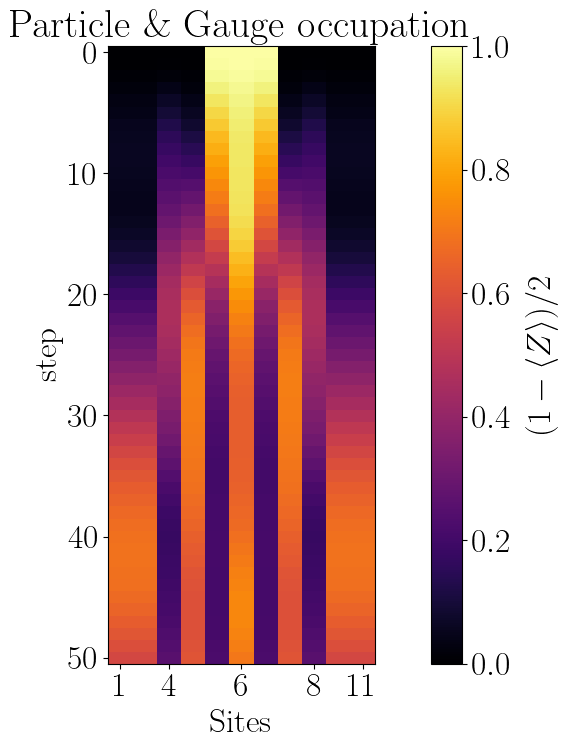

In [9]:
from z2chain import plotting
import os

plotting.x_t_plot(exact_occupation_site_gauge_matrix, filepath=os.path.join("Plots", os.path.basename(os.path.split(results_filepath)[1])) + ".png")

# Trotter dynamics example (Direct)

In [14]:
L = 6
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 2

final_time = 10
layers = 100
measure_every_layers = 1

results_filepath = f"Results/trotter_z2ppairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_1.txt"
overwrite = False

In [15]:
import z2chain.exact as z2ced

trotter_occupation_site_gauge_matrix = z2ced.trotter_particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, layers, measure_every_layers, results_filepath, overwrite=overwrite, print_mode=True)

t = 990.0000 / t_f = 10.0000 / Trotter_steps = 99 of 100

/Users/cobos/MEGAsync/Doctorado/2nd year/IBM hardware execution/Repo/src/z2chain/exact.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  site_gauge_occupation_matrix[i // measure_every_layers] = this_qubits_occupation
/Users/cobos/MEGAsync/Doctorado/2nd year/IBM hardware execution/Repo/src/z2chain/exact.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  site_gauge_occupation_matrix[-1] = this_qubits_occupation


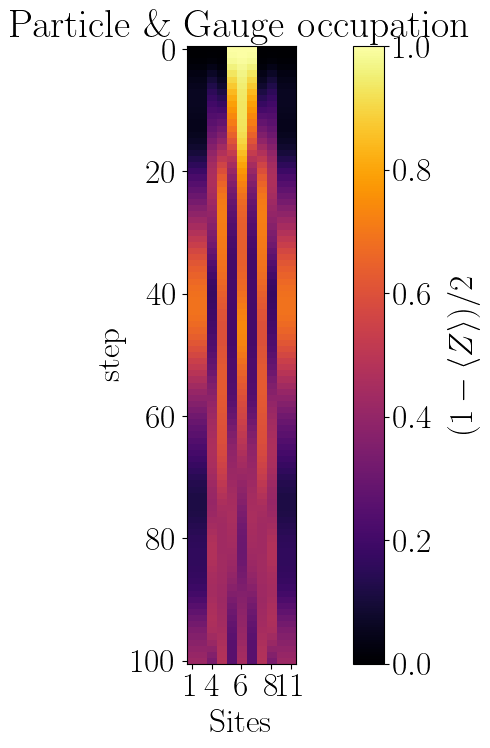

In [16]:
from z2chain import plotting

plotting.x_t_plot(trotter_occupation_site_gauge_matrix, filepath=os.path.join("Plots", os.path.basename(os.path.split(results_filepath)[1])) + ".png")

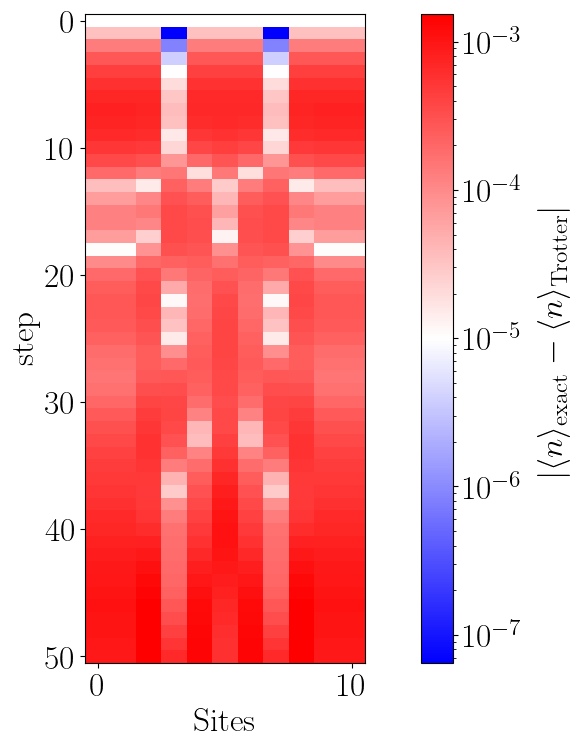

In [17]:
from z2chain.plotting import discrepancies_plot

discrepancies_plot(exact_occupation_site_gauge_matrix, trotter_occupation_site_gauge_matrix, filepath=os.path.join("Plots", "discrepancies_" + os.path.basename(os.path.split(results_filepath)[1])) + ".png")

# Dynamics example (Dual)

In [44]:
L = 12
J = 1
h = 0.01
lamb = 0.8

particle_pair_left_position = 5

final_time = 4
steps = 15

results_filepath = f"Results/dual_z2ppairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_1.txt"
overwrite = False

In [42]:
import z2chain.exact as z2ced

occupation_site_gauge_matrix = z2ced.dual_particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, results_filepath, overwrite=overwrite, print_mode=True)

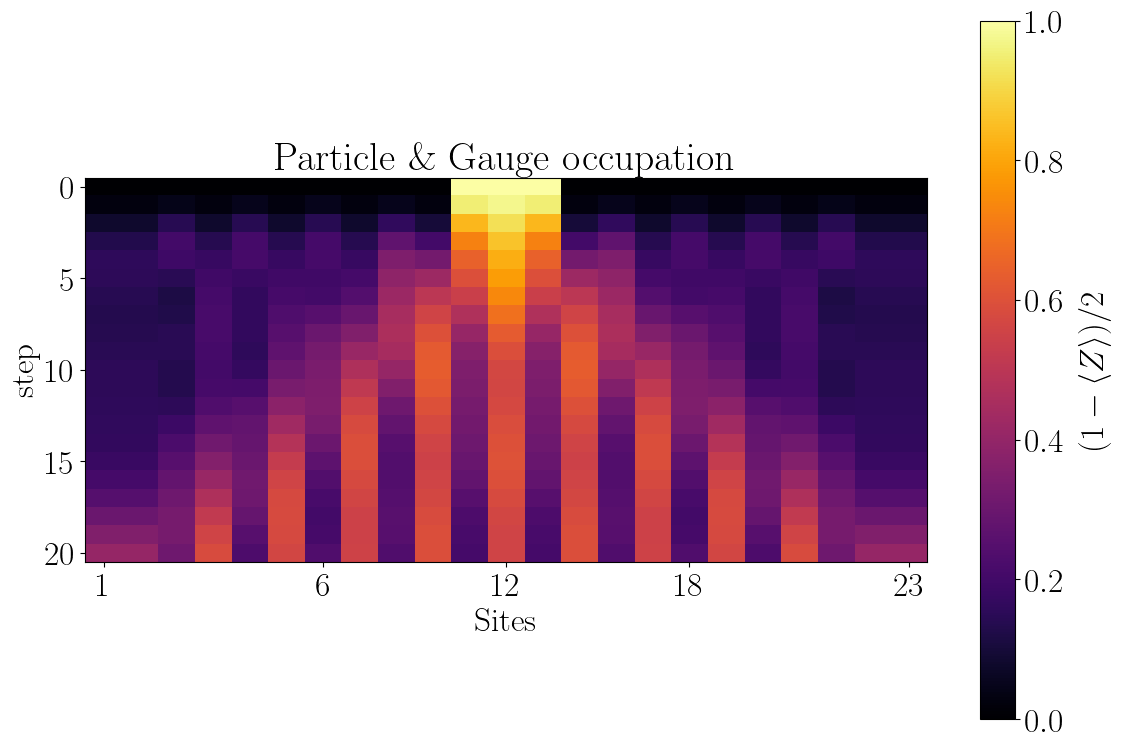

In [45]:
from z2chain import plotting

plotting.x_t_plot(occupation_site_gauge_matrix, filepath=os.path.join("Plots", os.path.basename(os.path.split(results_filepath)[1])) + ".png")